# Lab 3: Rigid Registration


## Remainder

Among other useful information, it tells you to make a copy of this Colab notebook BEFORE you try to run it:

- Make a copy on your own Colab space by clicking on the `copy to drive` button.
- Alternatively you could go to the menu `File > Save a copy in Drive`
- Then, open your new file on a new tap and rename it, and you’re ready to start tinkering with the code
- Look carefully at the existing code before you execute it. Try to understand what the code is doing. Part of your learning outcome is to understand it, and we will quiz you about it.
- In several places of the code, you’ll find `#__________TO DO_________`.
There you should introduce your code.

Once you are done, submit this notebook by the lab deadline, with the cells executed and including your **answers** in the text fields in $\color{red}{\text{red}}$ color.

Use `$\color{red}{\text{This is my red text}}$` to write "$\color{red}{\text{This is my red text}}$".

# Loading the required files
You can load into the temporal workspace of Colab the following required files:

*   the data files `LAB3_data`. Download them from Moodle to your computer and uncompress them.

You should copy these files from your computer using the function `files.upload()`. Use the `Choose Files` button to upload both files from your local drive.

Don't use Safari, it is preferable to use google chrome

## Goals of this lab
The aim of this lab is to develop competences regarding teamwork and problem solving. By developing the proposed activity you will also become familiar with SIFT and planar transformations for rigid image registration: how to extract invariant features, how to describe them, how to match them and how to use them to compute a homography. Most importantly, this should give you some feeling about the strengths and weaknesses of local feature-based approaches.
It should be noted that before you start this activity, you should read Lowe’s paper on SIFT:

David G. Lowe, "Distinctive image features from scale-invariant keypoints," International Journal of Computer Vision, 60, 2 (2004), pp. 91-110.
The paper can be downloaded from [here](http://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf).

This lab requires working in teams of two (exceptionally three) students. The labs will be organized on the first lab session by the professor who acts as lab instructor.

Students will have to:

1. Test Lowe’s implementation on a set of images showing some skin lesions.
2. Register the images pairs corresponding to the same skin lesion using Lowe’s implementation to detect and match features, and implementing different motion models by estimating homography matrices.
3. Improve the registration accuracy by means of data normalization for the homography estimation.

In [1]:
# from google.colab import files
# uploaded = files.upload()

## Additional tools
In this lab, we will also make use of:
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- Routines in the aux_utils.py file, which should already be in the local directory
- Opencv
-...

In [2]:
import math, copy
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # This sets the Seaborn style

# plt.style.use('seaborn')

#from aux_utils import plt_house_x, plt_contour_wgrad, plt_gradients, plt_cost_vs_theta1
# from google.colab import files
# import time
from IPython import display
from time import sleep
# import opencv
import cv2
# from google.colab.patches import cv2_imshow

import pandas as pd
import io
import os

#Import math Library
import math
import scipy.linalg as linalg

In [3]:
data_dir = os.path.join(os.getcwd(), 'Lab3_data')

## Detect SIFT Keypoints and Descriptors
Now we will register real images.

Register skin1.png with skin2.png

First, load and show the images.

Also set SIFT to detect keypoints on images

$\color{yellow}{\text{To be done during 1st lab session}}$

In [4]:
skin_1 = cv2.imread(os.path.join(data_dir, "skin1.png"))
skin_2 = cv2.imread(os.path.join(data_dir, "skin2.png"))

print(skin_1.shape, skin_2.shape)

(894, 1090, 3) (894, 1090, 3)


In [5]:
def show_image_cv2(img):
    # Check if the image is loaded successfully
    if img is not None:
        # Display the image
        cv2.imshow('Image', img)

        # Wait for a key event and close the window
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Error: Unable to load the image.")

def show_image_plt(img, title):
    plt.figure(figsize=(12, 6))

    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    
    # Show the plot
    plt.show()

def show_image_and_modified(img1, img2, title1, title2):
    # Set a larger figure size
    plt.figure(figsize=(12, 6))

    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)) 
    plt.title(title1)
    plt.axis('off')


    # Display the modified image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)) 
    plt.title(title2)
    plt.axis('off')

    # Show the plot
    plt.show()   

def detect_sift_keypoints(image):
    image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(image_gray,None)

    # image_with_keypoints =cv2.drawKeypoints(image_gray,kp,image)
    image_with_keypoints =cv2.drawKeypoints(image_gray,kp,image, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    return kp, des, image_with_keypoints

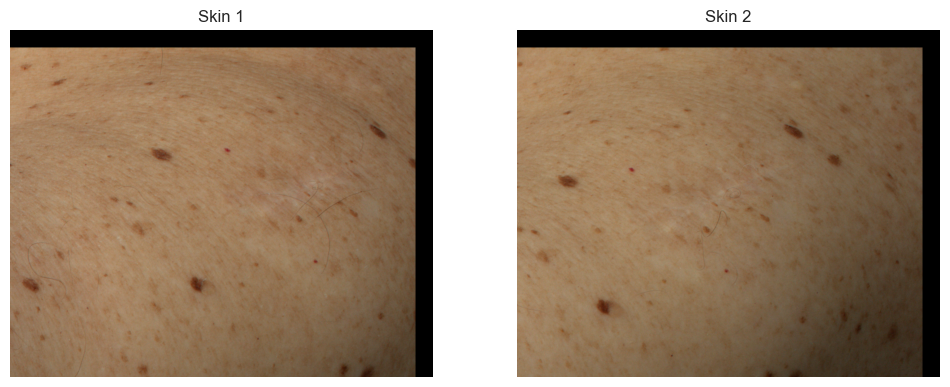

In [6]:
# show_image_plt(skin_1, "skin_1")
# show_image_plt(skin_2, "skin_2")

show_image_and_modified(skin_1, skin_2, "Skin 1", "Skin 2")

In [7]:
kp1, des1, image_with_keypoints1 = detect_sift_keypoints(skin_1)
kp2, des2, image_with_keypoints2 = detect_sift_keypoints(skin_2)

In [8]:
len(des2)

54

## Plot the Keypoints
$\color{yellow}{\text{To be done during 1st lab session}}$

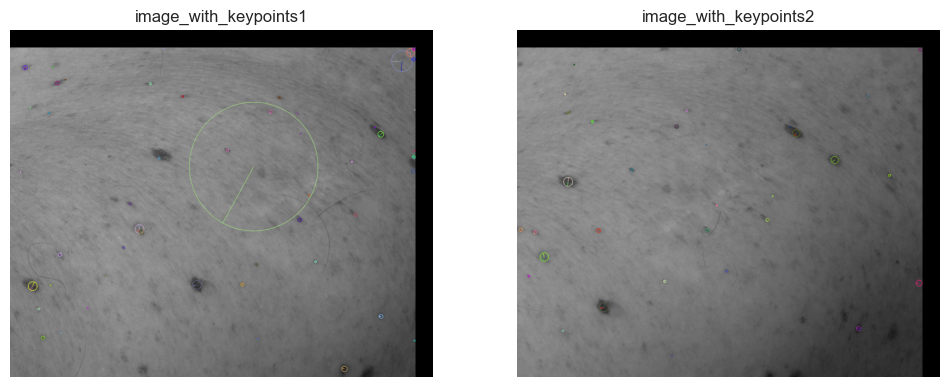

In [9]:
# show_image_plt(image_with_keypoints1, "skin_1")
# show_image_plt(image_with_keypoints2, "skin_2")

show_image_and_modified(image_with_keypoints1, image_with_keypoints2, "image_with_keypoints1", "image_with_keypoints2")

## Compute Brute Force Matching

$\color{yellow}{\text{To be done during 1st lab session}}$

In [10]:
def brute_force(img1, des1, kp1, img2, des2, kp2):
    # Create a BFMatcher object
    bf = cv2.BFMatcher()

    # Match descriptors using KNN
    matches = bf.knnMatch(des1, des2, k=1)

    # Draw matches
    img_matches = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    return matches, img_matches


In [11]:
matches, img_matches = brute_force(
    img1 = skin_1,
    des1 = des1,
    kp1  = kp1,
    img2 = skin_2, 
    des2 = des2,
    kp2  = kp2
)

Plot matches

$\color{yellow}{\text{To be done during 1st lab session}}$

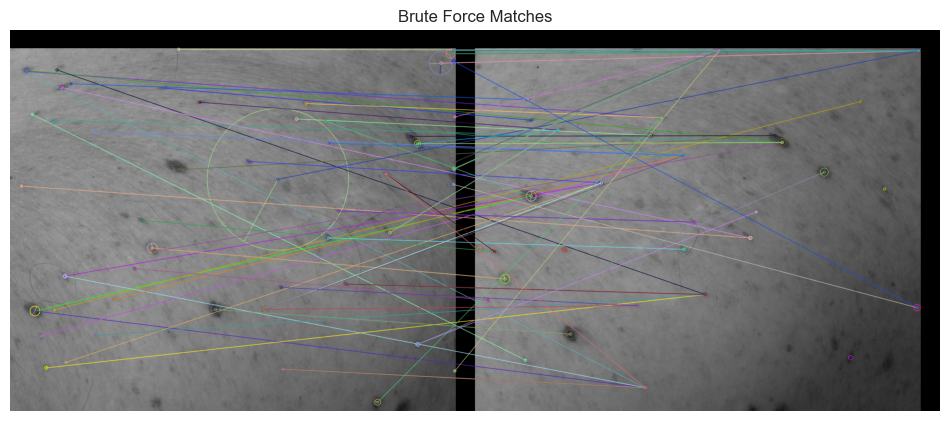

In [12]:
show_image_plt(img_matches, "Brute Force Matches")

## Lowe match

Now implement by yourself a function to match keypoints and descriptors between these 2 images

Implement the function `SIFT_match` following the article "Distinctive image features from scale-invariant keypoints" David G. Lowe.

$\color{yellow}{\text{To be done during 1st lab session}}$

In [13]:
def SIFT_match(img1, des1, kp1, img2, des2, kp2):
    # Create a BFMatcher object
    bf = cv2.BFMatcher()

    # Match descriptors using KNN
    # means that for each descriptor in the first set (des1), the two best matches in the second set (des2) are returned.
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply ratio test
    good_matches = []
    for NN1, NN2 in matches:
        ratio = NN1.distance / NN2.distance
        threshold = 0.8
        if ratio < threshold:
            good_matches.append(NN1)
            
    # Draw good matches
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return img_matches, good_matches


Recompute the matches using your function

$\color{yellow}{\text{To be done during 1st lab session}}$

In [14]:
img_matches, good_matches = SIFT_match(
    img1 = skin_1,
    des1 = des1,
    kp1  = kp1,
    img2 = skin_2, 
    des2 = des2,
    kp2  = kp2
)

Plot the new matches

$\color{yellow}{\text{To be done during 1st lab session}}$

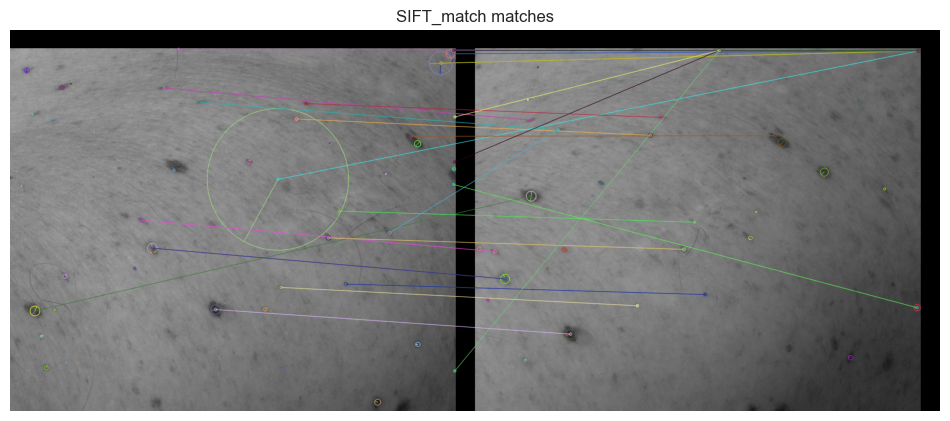

In [15]:
show_image_plt(img_matches, "SIFT_match matches")

## Compute Homographies

Compute the homography between both images using opencv function `cv2.findHomography`

Plot one of the images warped acording to the obtained Homograhy

$\color{yellow}{\text{To be done during 1st lab session}}$

In [16]:
# we will use both opencv and our implemented functions
def compute_homography(img1, kp1, des1, img2, kp2, des2):
    _, good_matches = SIFT_match(
        img1 = skin_1,
        des1 = des1,
        kp1  = kp1,
        img2 = skin_2, 
        des2 = des2,
        kp2  = kp2
    )
    
    # Extract matched keypoints
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Compute homography
    # homography, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    homography, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 10.0)


    return homography

def warp_image(img, homography):
    '''
    The calculated homography can be used to warp
    the source image to destination. Size is the
    size (width,height) of im_dst
    '''

    # Warp source image to destination based on homography
    im_out = cv2.warpPerspective(img, homography, (img.shape[1],img.shape[0]))

    return im_out
 

In [17]:
homography_matrix = compute_homography(
    img1 = skin_1,
    des1 = des1,
    kp1  = kp1,
    img2 = skin_2, 
    des2 = des2,
    kp2  = kp2
)

In [18]:
homography_matrix 

array([[ 9.68809653e-01, -3.01153646e-02, -2.40058358e+02],
       [-1.06104220e-01,  9.16156206e-01,  1.20579817e+02],
       [-6.03788606e-06, -9.40297967e-05,  1.00000000e+00]])

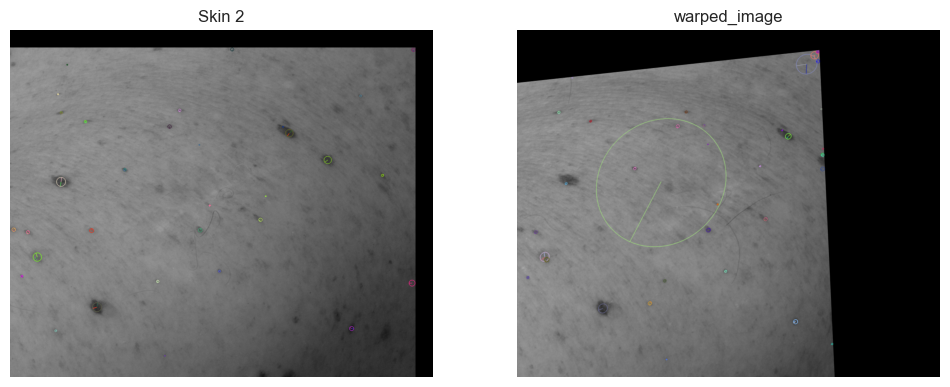

In [19]:
warped_image = warp_image(skin_1, homography_matrix)
# show_image_plt(warped_image, "warped_image")

show_image_and_modified(skin_2, warped_image, "Skin 2", "warped_image")

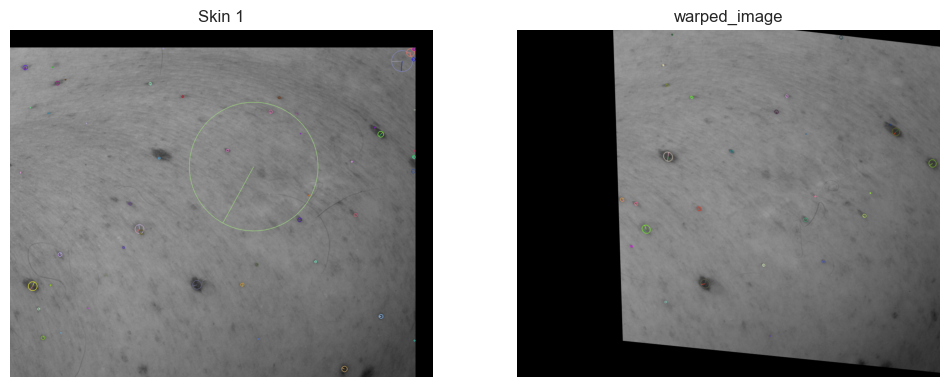

In [20]:
warped_image = warp_image(skin_2, np.linalg.inv(homography_matrix))
# show_image_plt(warped_image, "warped_image")

show_image_and_modified(skin_1, warped_image, "Skin 1", "warped_image")

## Homography estimation

$\color{yellow}{\text{To be done during 2nd lab session}}$

Next, we will load images `00.png`, `01.png`, `02.png` and `03.png`

In [21]:
img00c = cv2.imread("./Lab3_data/00.png")
img01c = cv2.imread("./Lab3_data/01.png")
img02c = cv2.imread("./Lab3_data/02.png")
img03c = cv2.imread("./Lab3_data/03.png")

And the csv files with keypoints

In [22]:
keypoints_00 = genfromtxt('./Lab3_data/Keypoints_00.csv', delimiter=',', skip_header = 0)
keypoints_01 = genfromtxt('./Lab3_data/Keypoints_01.csv', delimiter=',', skip_header = 0)
keypoints_02 = genfromtxt('./Lab3_data/Keypoints_02.csv', delimiter=',', skip_header = 0)
keypoints_03 = genfromtxt('./Lab3_data/Keypoints_03.csv', delimiter=',', skip_header = 0)

print(len(keypoints_00))
print(np.shape(keypoints_00))
print(keypoints_00)

64
(64, 2)
[[1266.3   232.7 ]
 [1266.3   320.63]
 [1266.3   407.7 ]
 [1266.3   495.64]
 [1266.3   582.7 ]
 [1266.3   670.63]
 [1266.3   757.7 ]
 [1266.3   845.63]
 [1178.4   232.7 ]
 [1178.5   320.5 ]
 [1178.5   408.  ]
 [1178.5   495.5 ]
 [1178.5   583.  ]
 [1178.5   670.5 ]
 [1178.5   758.  ]
 [1178.3   845.65]
 [1091.3   232.7 ]
 [1091.    320.5 ]
 [1091.    408.  ]
 [1091.    495.5 ]
 [1091.    583.  ]
 [1091.    670.5 ]
 [1091.    758.  ]
 [1091.3   845.63]
 [1003.4   232.7 ]
 [1003.5   320.5 ]
 [1003.5   408.  ]
 [1003.5   495.5 ]
 [1003.5   583.  ]
 [1003.5   670.5 ]
 [1003.5   758.  ]
 [1003.3   845.65]
 [ 916.3   232.7 ]
 [ 916.    320.5 ]
 [ 916.    408.  ]
 [ 916.    495.5 ]
 [ 916.    583.  ]
 [ 916.    670.5 ]
 [ 916.    758.  ]
 [ 916.3   845.64]
 [ 828.37  232.7 ]
 [ 828.5   320.5 ]
 [ 828.5   407.99]
 [ 828.5   495.5 ]
 [ 828.5   583.  ]
 [ 828.5   670.5 ]
 [ 828.5   758.  ]
 [ 828.35  845.65]
 [ 741.3   232.7 ]
 [ 741.    320.5 ]
 [ 741.    408.  ]
 [ 741.    495.5 ]
 

Now plot img00c, img01c, img02c, img03c all images using `cv2_imshow` from `opencv`

In [23]:
img00c.shape

(1080, 1920, 3)

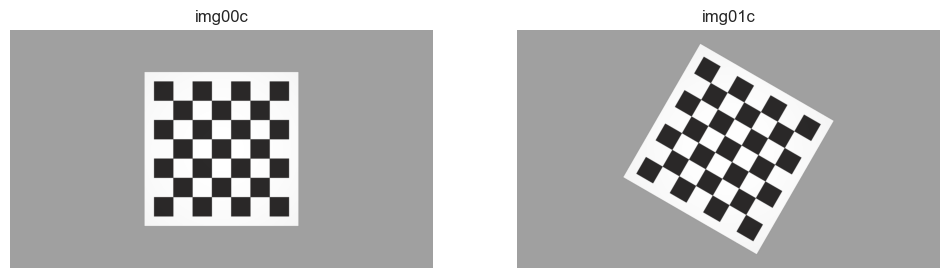

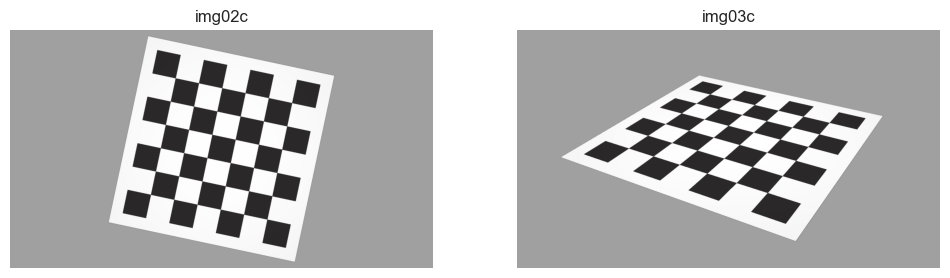

In [24]:
show_image_and_modified(img00c, img01c, "img00c", "img01c")
show_image_and_modified(img02c, img03c, "img02c", "img03c")

Plot Keypoints on images.

In [25]:
def plot_keypoints(image, keypoints):
    for kp in keypoints:
        kp_int = tuple(map(int, kp))
        cv2.circle(image, kp_int, 8, (0, 0, 255), 4)
    return image

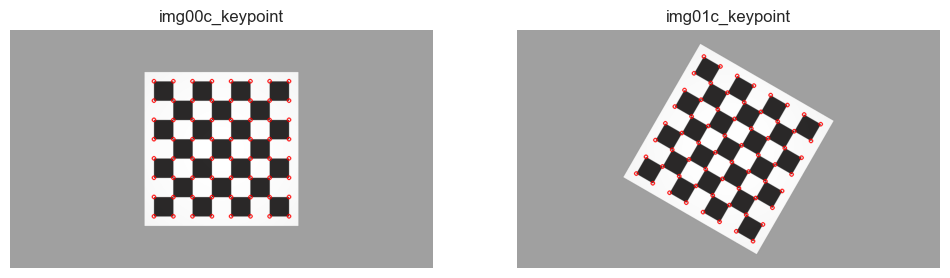

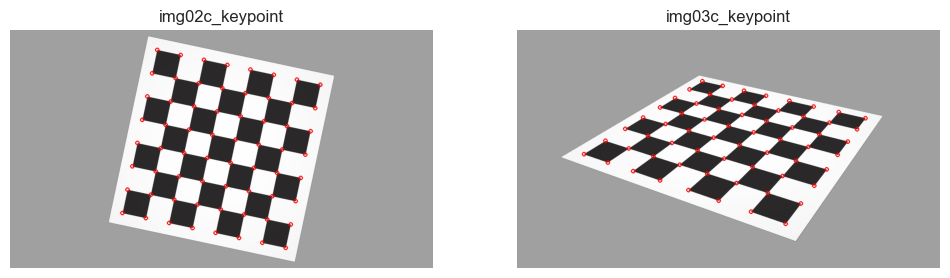

In [26]:
img00c_keypoint = plot_keypoints(img00c, keypoints_00)
img01c_keypoint = plot_keypoints(img01c, keypoints_01)
img02c_keypoint = plot_keypoints(img02c, keypoints_02)
img03c_keypoint = plot_keypoints(img03c, keypoints_03)

show_image_and_modified(img00c_keypoint, img01c_keypoint, "img00c_keypoint", "img01c_keypoint")
show_image_and_modified(img02c_keypoint, img03c_keypoint, "img02c_keypoint", "img03c_keypoint")

## Compute Homography

Implement the function:

H = computeHomography(features, matches, model)

where model can be ('Euclidean', 'Similarity', 'Affine', 'Porjective')

follow your notes from MIRA lessons, don't use any opencv existing function

In [30]:
def computeHomography(features, matches, model):
    '''
        features: points from the input image (xi, yi)
        matches: points from the output image(xi', yi')
    '''
    # validate the model
    assert model in ['Euclidean', 'Similarity', 'Affine', 'Projective'], 'Model doesn\'t exist within this implementation.'

    n_points = len(features)

    if model in ['Euclidean', 'Similarity']:
        n_unknowns = 4 # Euclidean without scale, Similarity with scale
        A_mat = np.zeros((2*n_points, n_unknowns))
        x_mat = np.zeros((n_unknowns, 1))
        b_mat = np.zeros((2*n_points, 1))      
        
    elif model == 'Affine':
        n_unknowns = 6
        A_mat = np.zeros((2*n_points, n_unknowns))
        x_mat = np.zeros((n_unknowns, 1))
        b_mat = np.zeros((2*n_points, 1))
        
    
    for index, (feature, match) in enumerate(zip(features, matches)):
        if model in ['Euclidean', 'Similarity']:
            A_values = np.array([[feature[0], -feature[1], 1, 0],
                                 [feature[1],  feature[0], 0, 1]])
            
        elif model == 'Affine':
            A_values = np.array([[feature[0], feature[1], 1, 0, 0, 0],
                                 [0, 0, 0, feature[0], feature[1], 1]])
            
        A_mat[2 * index:2 * index + 2, :] = A_values
        b_mat[2 * index] = match[0]
        b_mat[2 * index + 1] = match[1]

    # solving using least-squares
    A_transpose_A_inv = np.linalg.inv(A_mat.T @ A_mat)
    A_transpose_b = A_mat.T @ b_mat
    x_mat = A_transpose_A_inv @ A_transpose_b

    # matrix reconstruction and reshaping
    if model in ['Euclidean', 'Similarity']:
        scos_theta = x_mat[0][0]
        ssin_theta = x_mat[1][0]
        
        theta = math.atan2(ssin_theta, scos_theta)

        # scale factor - double check
        s = ssin_theta / (scos_theta * math.tan(theta))
        
        tx         = x_mat[2][0]
        ty         = x_mat[3][0]

        x_mat = np.array([[scos_theta, -ssin_theta, tx],
                          [ssin_theta,  scos_theta, ty],
                          [0, 0, 1]])

        if model == 'Euclidean':
            # remove the scale from the 2x2 matrix
            print(s)
            x_mat[:2, :2] /= s
        
    elif model == 'Affine':
        x_mat = x_mat.reshape((2, 3))
        x_mat = np.vstack([x_mat, [0, 0, 1]])

    return x_mat

##Compute Eucliedean Homography

Compute the Euclidean Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

1.0000000000000002
[[   0.86597887   -0.50054303  398.60003301]
 [   0.50054303    0.86597887 -407.93223947]
 [   0.            0.            1.        ]]


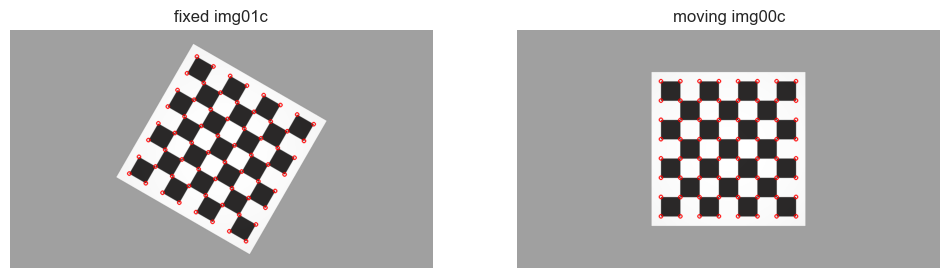

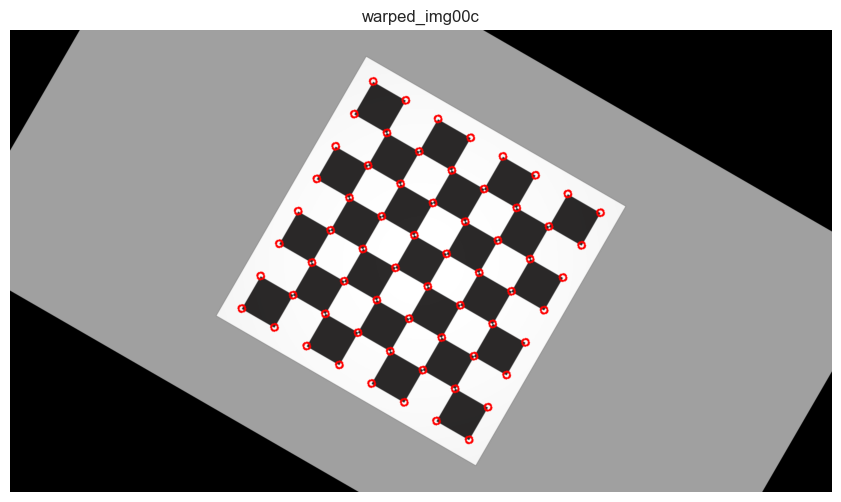

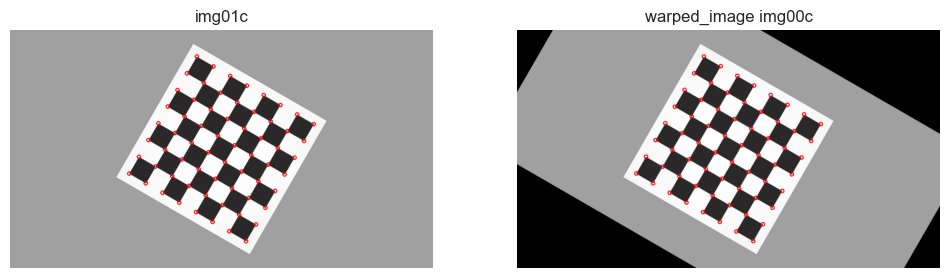

In [33]:
homography_matrix = computeHomography(keypoints_00, keypoints_01, model='Euclidean')
print(homography_matrix)

warped_image = warp_image(img00c, homography_matrix)
show_image_and_modified(img01c, img00c, "fixed img01c", "moving img00c")
show_image_plt(warped_image, "warped_img00c")
show_image_and_modified(img01c, warped_image, "img01c", "warped_image img00c")


##Compute Similarity Homography
Compute the Similarity Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

[[   0.86597887   -0.50054303  398.60003301]
 [   0.50054303    0.86597887 -407.93223947]
 [   0.            0.            1.        ]]


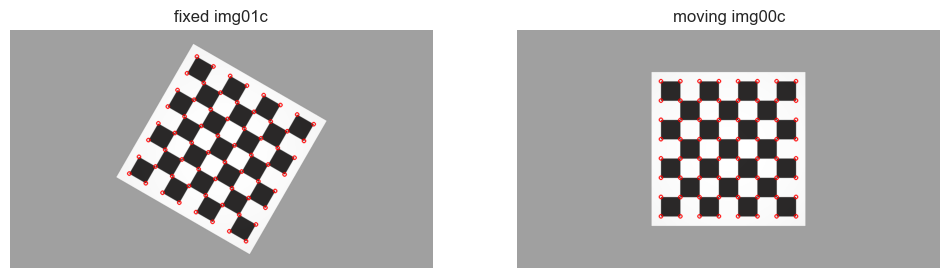

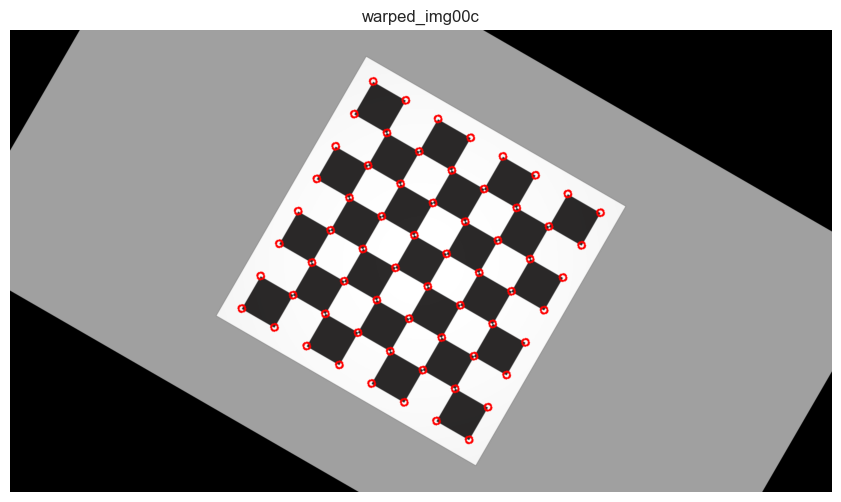

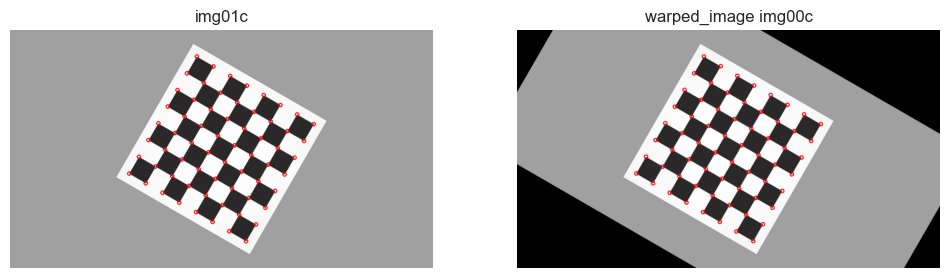

In [34]:
homography_matrix = computeHomography(keypoints_00, keypoints_01, model='Similarity')
print(homography_matrix)

warped_image = warp_image(img00c, homography_matrix)
show_image_and_modified(img01c, img00c, "fixed img01c", "moving img00c")
show_image_plt(warped_image, "warped_img00c")
show_image_and_modified(img01c, warped_image, "img01c", "warped_image img00c")

##Compute Affine Homography

Compute the Affine Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

[[   0.86599858   -0.50052362  398.5706507 ]
 [   0.50056245    0.86595917 -407.94024374]
 [   0.            0.            1.        ]]


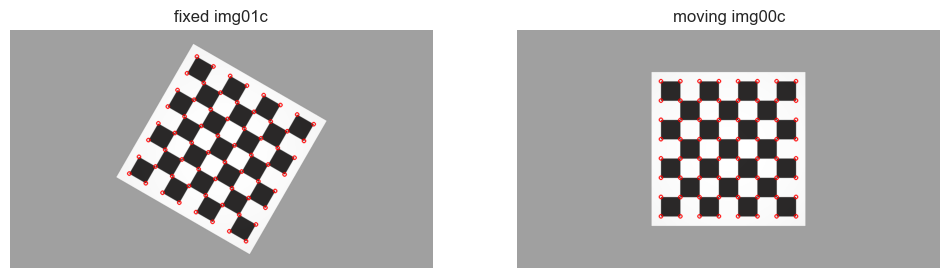

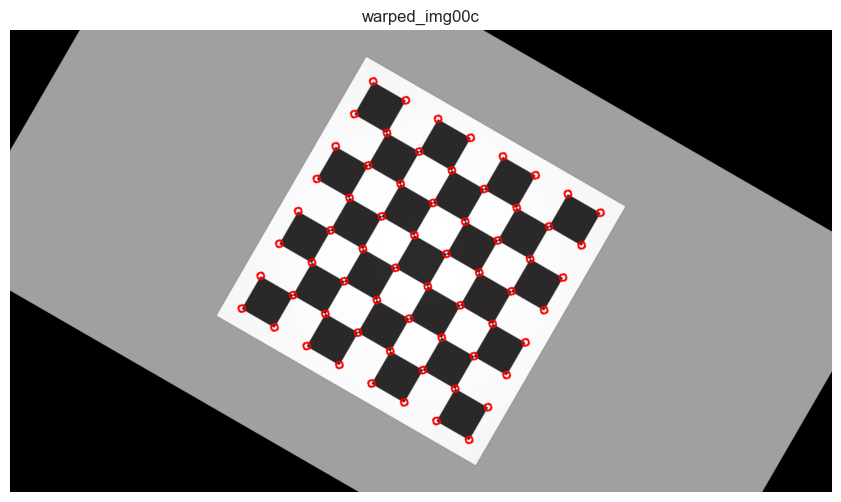

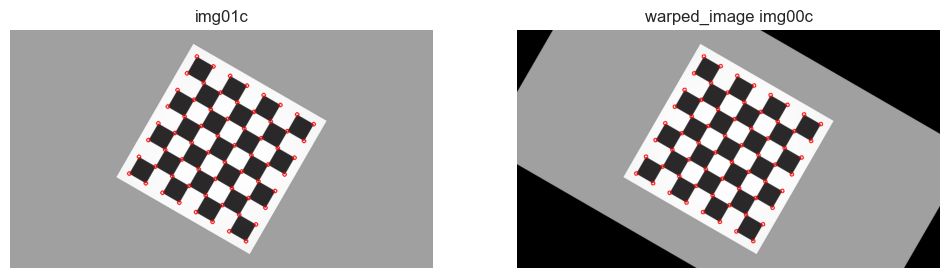

In [37]:
homography_matrix = computeHomography(keypoints_00, keypoints_01, model='Affine')

print(homography_matrix)
# h11
# h12
# h13
# h21
# h22
# h23

# img00c, img01c
warped_image = warp_image(img00c, homography_matrix)
show_image_and_modified(img01c, img00c, "fixed img01c", "moving img00c")
show_image_plt(warped_image, "warped_img00c")
show_image_and_modified(img01c, warped_image, "img01c", "warped_image img00c")

##Compute Projective Homography

Compute the Euclidean Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

##Comment the previous obtained results.

Which is the best homography for each image pair? Why?

$\color{red}{\text{ANSWER}}$

## Compute Homography with skin images

Now Compute the Homography between the 2 skin images used during the first sesion using your Homography Computation function. Use all models and and compare the results

## You should notice that you have outliers when you compute the Homography.

Implement RANSAC function and recompute all the Homographies using it.

Finally Warp one of the images and compare your results with the ones obtained using opencv functions.

## Extra Work

There are many ways to apply *Deep Learning* for registering images. Do some research and find a solution that uses it and apply it to skin1 and skin2 images.


## Congratulations!
In this lab you:
- tested SIFT Algorithm
- implemented homography computation

Submit this notebook by the lab deadline, with the cells executed and including your **answers** in the text fields in $\color{red}{\text{red}}$ color.